## Partitioning a dataset into training and test datasets

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

In [2]:
# Both features and target have already been scaled: mean = 0; SD = 1
# See Chapter 4-0 for a descrition of this dataset
path = './data/'
df = pd.read_csv(path + 'Data_HousePrice_cleaned.csv') 
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,RL,80.0,9600,Reg,Other,Other,1Story,6,8,1976,1976,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,RL,60.0,9550,IR1,Corner,Other,2Story,7,5,1915,1970,Wd Sdng,Other,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,RL,84.0,14260,IR1,Other,Other,2Story,8,5,2000,2000,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000


A convenient way to randomly partition this dataset into separate test and
training datasets is to use the train_test_split function from scikit-learn's
model_selection submodule.

>**Model Selection : sklearn.model_selection**
>
>The selection process for the best machine learning models is largely an iterative process where data scientists search >for the best model and the best hyper-parameters. Scikit-learn offers us many useful utilities that are helpful in both >training, testing and model selection phases. In this module, there exists utilities like KFold, train_test_split(), >GridSearchCV and RandomizedSearchCV. 

In [3]:
cat_feat = list(df.dtypes[df.dtypes == 'object'].index)
numerical_feat = list(df.dtypes[df.dtypes != 'object'].index)

cat_dataset = df[cat_feat].copy()
num_dataset = df[numerical_feat].copy()
df_numerical = pd.DataFrame(num_dataset, columns=numerical_feat)

cat_dummies = pd.get_dummies(cat_dataset)
df = pd.concat([df_numerical, cat_dummies], axis = 1)

In [4]:
df.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_Other,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Other,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Somerst,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_Other,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Other,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [5]:
from sklearn.model_selection import train_test_split

cols = list(df.columns)
cols.remove('SalePrice')
X = df[cols].copy()
y = df['SalePrice'].copy()

X_appo, X_test, y_appo, y_test =train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_valid, y_train, y_valid =train_test_split(X_appo, y_appo, test_size=0.3, random_state=0)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_valid.reset_index(drop=True, inplace=True)

print("X_train & y_train shape:", X_train.shape, y_train.shape)
print("X_valid & y_valid shape:", X_valid.shape, y_valid.shape)
print("X_test & y_test shape:", X_test.shape, y_test.shape)

X_train & y_train shape: (1075, 110) (1075,)
X_valid & y_valid shape: (461, 110) (461,)
X_test & y_test shape: (659, 110) (659,)


First, we assigned the NumPy array representation of the feature columns from 0 to ncol-1 to
the variable X and we assigned the class labels from the last column to the variable
y. Then, we used the train_test_split function to randomly split X and y into
separate training and test datasets. By setting test_size=0.3, we assigned 30
percent of the wine examples to X_test and y_test, and the remaining 70 percent
of the examples were assigned to X_train and y_train, respectively.

In [6]:
#list(X_train.columns).remove(*numerical_feat)

In [7]:
if 'SalePrice' in numerical_feat:
    numerical_feat.remove('SalePrice')
categorical_features = [feat for feat in list(X_train.columns) if feat not in numerical_feat]
#categorical_features

In [8]:
#pd.concat([df_train_scaled, X_train[categorical_features]], axis = 1)

In [9]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()

sd.fit(X_train[numerical_feat])
X_train_scaled = sd.transform(X_train[numerical_feat])
df_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_feat)
df_train = pd.concat([df_train_scaled, X_train[categorical_features]], axis = 1)

X_valid_scaled = sd.transform(X_valid[numerical_feat])
df_valid_scaled = pd.DataFrame(X_valid_scaled, columns=numerical_feat)
df_valid = pd.concat([df_valid_scaled, X_valid[categorical_features]], axis = 1)

X_test_scaled = sd.transform(X_test[numerical_feat])
df_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_feat)
df_test = pd.concat([df_test_scaled, X_test[categorical_features]], axis = 1)

print("X_train & y_train shape:", df_train.shape, y_train.shape)
print("X_valid & y_valid shape:", df_valid.shape, y_valid.shape)
print("X_test & y_test shape:", df_test.shape, y_test.shape)

X_train & y_train shape: (1075, 110) (1075,)
X_valid & y_valid shape: (461, 110) (461,)
X_test & y_test shape: (659, 110) (659,)


## Selecting meaningful features: Regularization

In [10]:
#X_train_scaled

In [11]:
import warnings
warnings.filterwarnings('ignore')

###  Ridge Regression 





Ridge regression is a regularization technique where we change the function that is to be minimize. Reduce magnitude of regression coefficients by choosing a parameter $\lambda$ and minimizing
		
\begin{equation}
		\frac{1}{2N} \sum\limits_{n=1}^N \left[h_\theta \left( x^{(n)} \right) - y ^{(n)}\right]^2	+ \lambda \sum\limits_{n=1}^N \theta_i^2 \notag
\end{equation}

This change has the effect of encouraging the model to keep the weights $b_j$ as small as possibile. The Ridge regression should only be used for determining model parameters using the training set. Once the model parameters have been determined the penalty term should be removed for prediction.

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def plot_result(y_prediction, Y_true):
    fig , ax = plt.subplots(1,1,figsize=(10,5))
    ax.scatter(y_prediction, Y_true)
    ax.plot([0,500000],[0,500000], "--", c='red', label = "$Y_{pred} = Y_{true}$")
    ax.set_xlabel("$Y_{pred}$", fontsize = 12)
    ax.set_ylabel("$Y_{true}$", fontsize = 12)
    plt.legend()
    plt.show()
    print("mean_absolute_error:", mean_absolute_error(y_prediction, Y_true))
    print("mean_squared_error:", mean_squared_error(y_prediction, Y_true))
    print("mean_absolute_percentage_error:", mean_absolute_percentage_error(y_prediction, Y_true))

ALPHA:  0.1
TRAIN RESULT


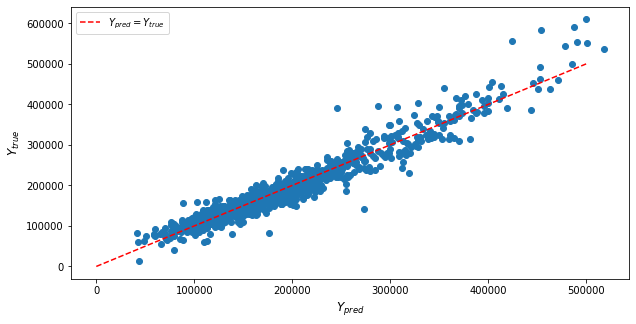

mean_absolute_error: 15544.371561799167
mean_squared_error: 490701805.8041578
mean_absolute_percentage_error: 0.08995871491240313
VALID RESULT


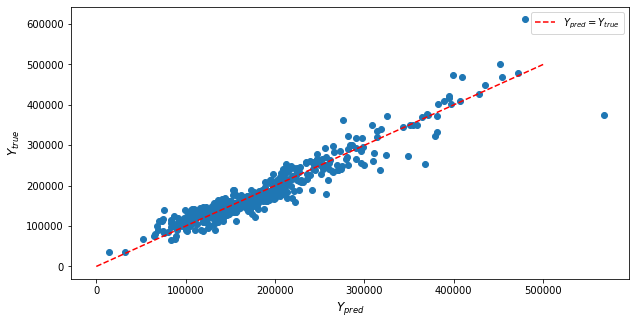

mean_absolute_error: 17587.37408423527
mean_squared_error: 618238518.0658513
mean_absolute_percentage_error: 0.10889458568645266
ALPHA:  1.0
TRAIN RESULT


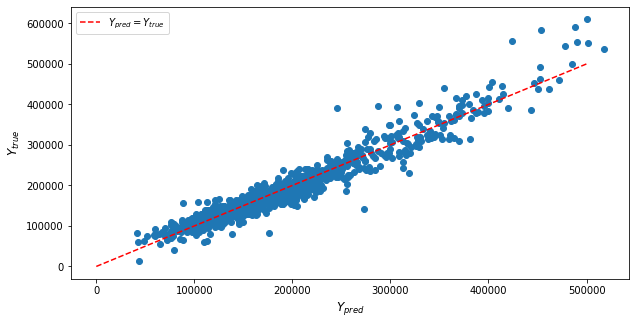

mean_absolute_error: 15543.848507711718
mean_squared_error: 490779704.2107828
mean_absolute_percentage_error: 0.08995014179668259
VALID RESULT


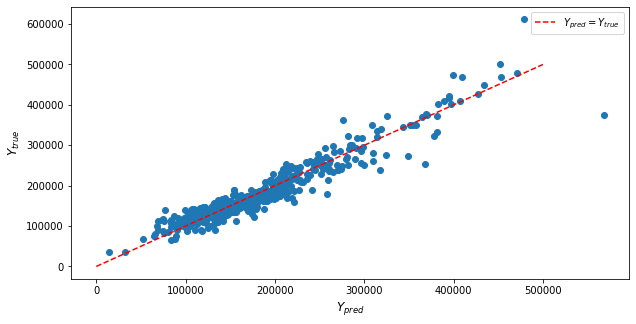

mean_absolute_error: 17544.70846141239
mean_squared_error: 615754244.9449093
mean_absolute_percentage_error: 0.10871123065981692
ALPHA:  3.0
TRAIN RESULT


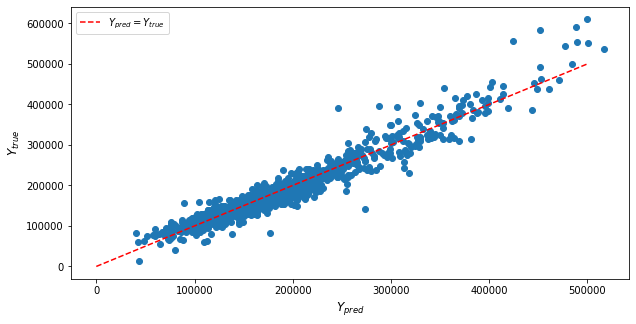

mean_absolute_error: 15545.479984884481
mean_squared_error: 491146337.0691283
mean_absolute_percentage_error: 0.08997148955790293
VALID RESULT


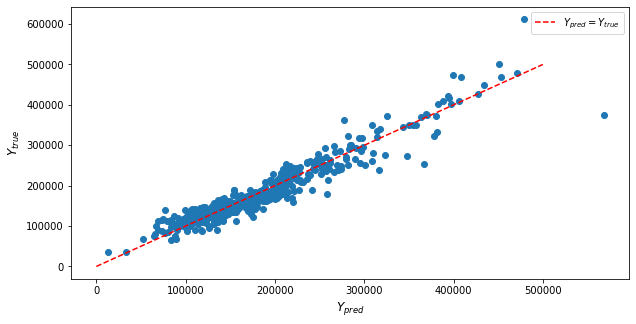

mean_absolute_error: 17473.999322525422
mean_squared_error: 611926819.0863013
mean_absolute_percentage_error: 0.10844728040493946
ALPHA:  5.0
TRAIN RESULT


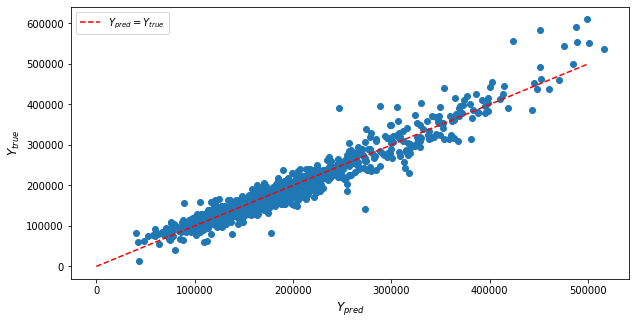

mean_absolute_error: 15552.538881298538
mean_squared_error: 491656424.98740834
mean_absolute_percentage_error: 0.09002450608535784
VALID RESULT


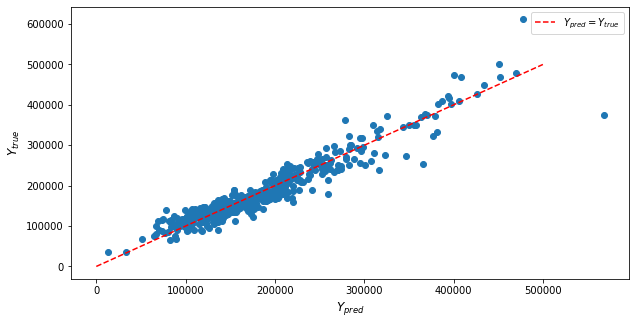

mean_absolute_error: 17417.082858239624
mean_squared_error: 609007620.9562207
mean_absolute_percentage_error: 0.10824678917297223
ALPHA:  10.0
TRAIN RESULT


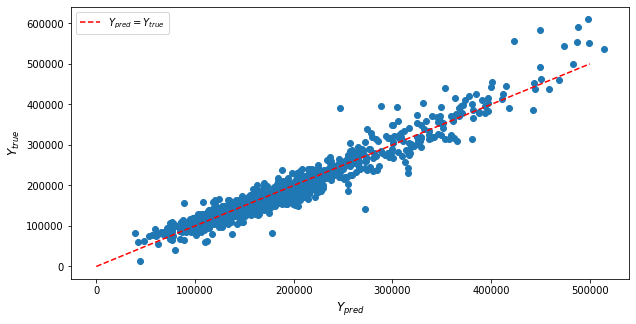

mean_absolute_error: 15569.131402257035
mean_squared_error: 493357234.3053626
mean_absolute_percentage_error: 0.09014277176991374
VALID RESULT


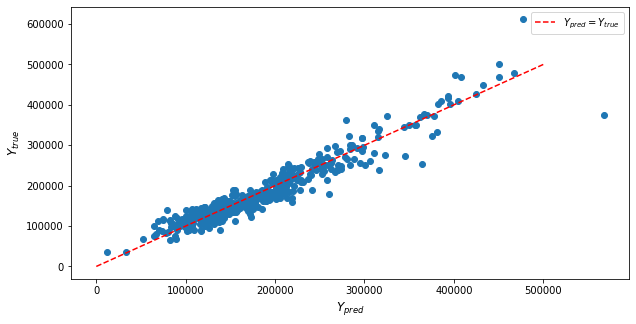

mean_absolute_error: 17310.82139596396
mean_squared_error: 603349388.0628014
mean_absolute_percentage_error: 0.1078646326764684
ALPHA:  50.0
TRAIN RESULT


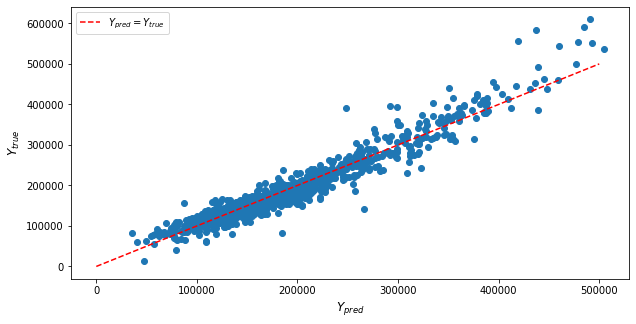

mean_absolute_error: 15783.215506924276
mean_squared_error: 514447492.7164881
mean_absolute_percentage_error: 0.09119450766216045
VALID RESULT


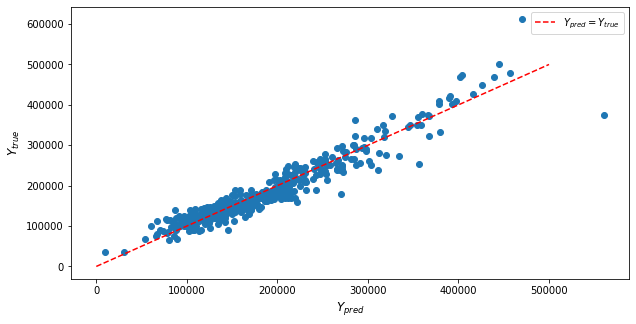

mean_absolute_error: 16983.085133363245
mean_squared_error: 582959412.0190861
mean_absolute_percentage_error: 0.10624377404359303
ALPHA:  100.0
TRAIN RESULT


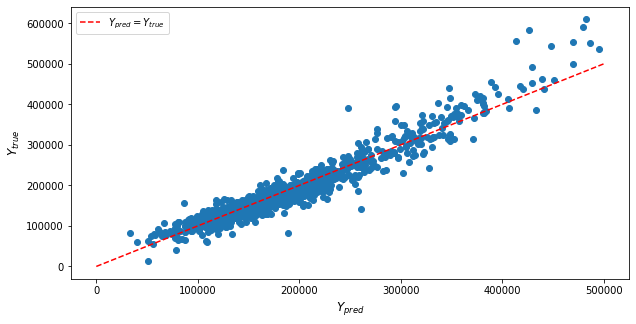

mean_absolute_error: 16091.800258790989
mean_squared_error: 543026292.8828355
mean_absolute_percentage_error: 0.09244439258425259
VALID RESULT


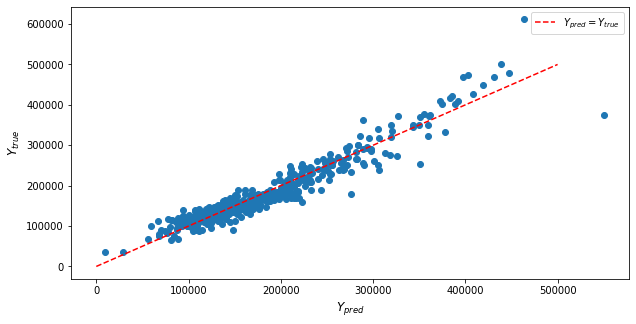

mean_absolute_error: 16890.246139078867
mean_squared_error: 576543484.114276
mean_absolute_percentage_error: 0.10458437923002052
ALPHA:  500.0
TRAIN RESULT


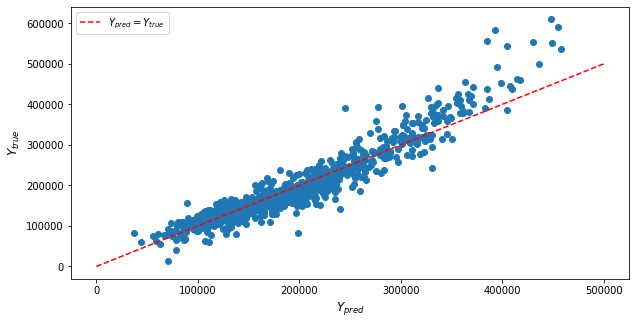

mean_absolute_error: 18020.666431371174
mean_squared_error: 720839912.8005296
mean_absolute_percentage_error: 0.09773716630254203
VALID RESULT


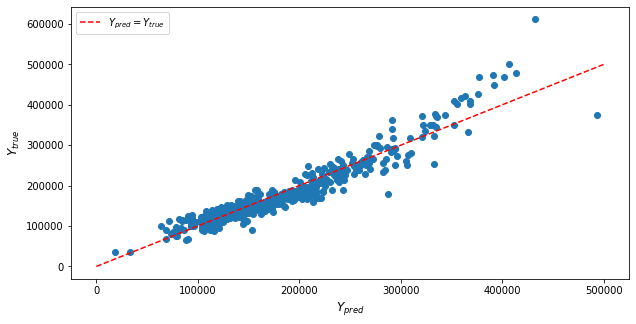

mean_absolute_error: 17558.091652620576
mean_squared_error: 621433077.3488717
mean_absolute_percentage_error: 0.09904466954741036
ALPHA:  1000.0
TRAIN RESULT


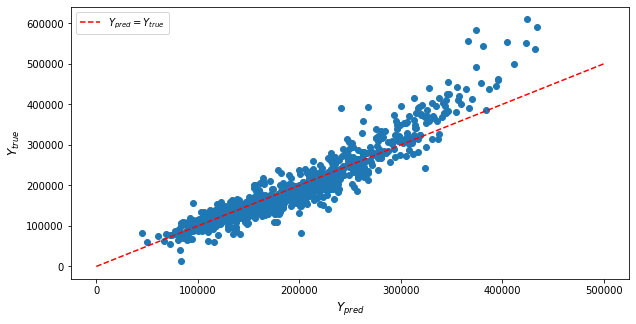

mean_absolute_error: 19499.606189810427
mean_squared_error: 884920148.1126513
mean_absolute_percentage_error: 0.10132033496246287
VALID RESULT


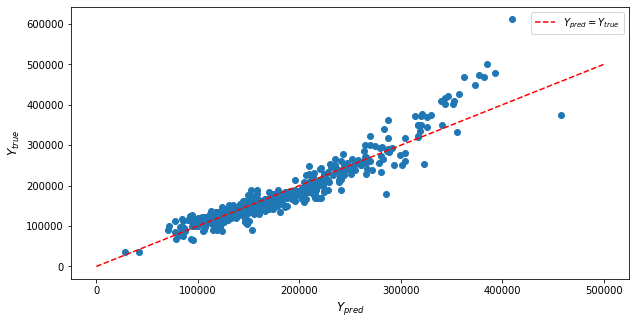

mean_absolute_error: 18190.977336178
mean_squared_error: 706350403.7281036
mean_absolute_percentage_error: 0.09735128270259795
ALPHA:  2000.0
TRAIN RESULT


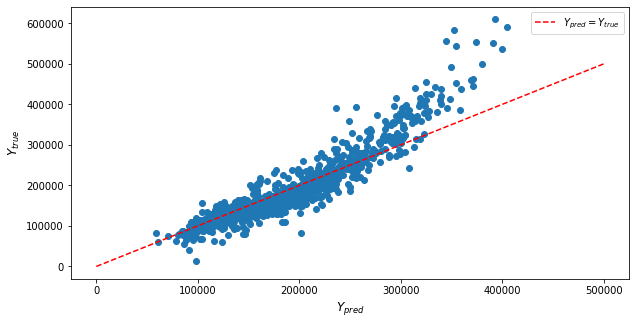

mean_absolute_error: 21779.20183395452
mean_squared_error: 1156491155.7392652
mean_absolute_percentage_error: 0.10911909573813841
VALID RESULT


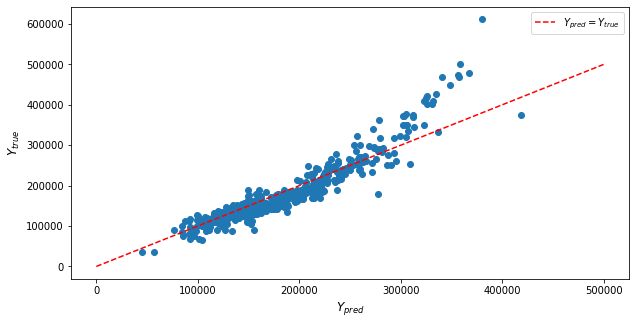

mean_absolute_error: 19571.40540470909
mean_squared_error: 885136845.5601625
mean_absolute_percentage_error: 0.10103104183088601


In [13]:
alphas=np.array([0.1, 1, 3, 5, 10, 50, 100, 500, 1000, 2000])
mses_train = []
mses_valid = []

for alpha in alphas:
    print("ALPHA: ", alpha)
    ridge = Ridge(alpha)
    ridge.fit(df_train.values, y_train)
    pred_train = ridge.predict(df_train.values)
    mses_train.append(mean_squared_error(pred_train,y_train))
    print("TRAIN RESULT")
    plot_result(pred_train, y_train)
    
    pred_valid =  ridge.predict(df_valid.values)
    mses_valid.append(mean_squared_error(pred_valid,y_valid))
    print("VALID RESULT")
    plot_result(pred_valid, y_valid)
    
    

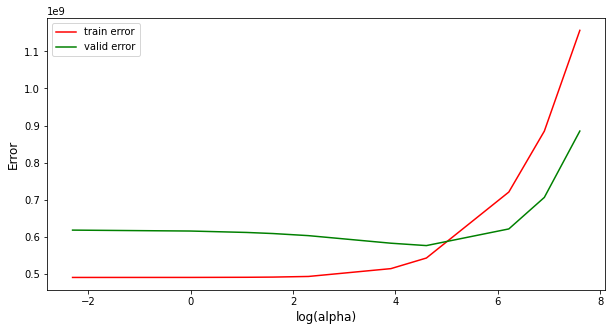

In [14]:
fig , ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(np.log(alphas), mses_train, label="train error", c = "red")
ax.plot(np.log(alphas), mses_valid, label="valid error", c = "green")
ax.set_xlabel("log(alpha)", fontsize=12)
ax.set_ylabel("Error", fontsize=12)
ax.legend()
plt.show()

In [15]:
ridge = Ridge(10)
ridge.fit(X_train.values, y_train)

pred_test =  ridge.predict(df_test.values)
mse_test = mean_squared_error(pred_test,y_test)

pred_valid =  ridge.predict(df_valid.values)
mse_valid = mean_squared_error(pred_valid,y_valid)

pred_train =  ridge.predict(df_train.values)
mse_train = mean_squared_error(pred_train,y_train)

print("MSE test: ",mse_test )
print("MSE train: ",mse_train )
print("MSE valid: ",mse_valid )

MSE test:  263592434884.50394
MSE train:  265169486437.53134
MSE valid:  266366329758.23325
